In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [15]:
df = pd.read_csv("./student_performance_new.csv")
df.head()

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1


In [16]:
df.columns

Index(['Sl.No.', 'USN', 'STUDENT NAME', 'Test I ', 'Test II ', 'Test III',
       'Test Total ', 'Test Result ', 'Quiz 1', 'Quiz 2', 'Compensatory',
       'Quiz', 'Quiz Result ', 'Test + Quiz', 'Assignment ', 'Unnamed: 15',
       'Assignment Result ', 'Result'],
      dtype='object')

In [22]:
# df.head()
# df.tail()
# df.info()
# df.columns()
# df.describe()
df.isna().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [23]:
X = df[["Test Result ","Quiz Result ","Assignment Result "]]
y = df.Result

In [24]:
X.head()

,Test Result,Quiz Result,Assignment Result
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = DecisionTreeClassifier(criterion='gini',splitter='random',random_state=42,max_depth=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42, splitter='random')

In [32]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11



[Text(0.6, 0.8333333333333334, 'x[0] <= 0.196\ngini = 0.5\nsamples = 43\nvalue = [21, 22]'),
 Text(0.4, 0.5, 'x[1] <= 0.9\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.8, 0.5, 'gini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.7, 0.6666666666666667, '  False')]

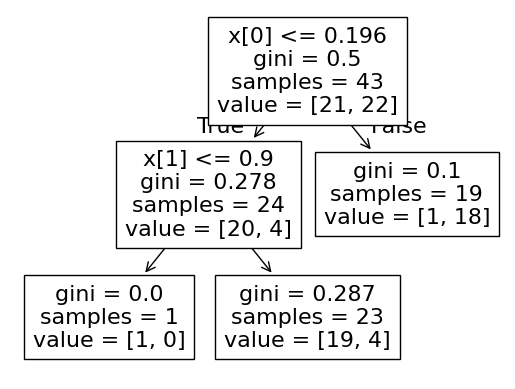

In [34]:
from sklearn.tree import plot_tree

plot_tree(clf)